In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from utils.model import VAE
from utils.callback import Display_sampling
from utils.utils import plot_latent_space, plot_label_clusters

In [2]:
(train_images, y_train), (test_images, _) = tf.keras.datasets.mnist.load_data()

In [3]:
def preprocess_images(images):
    return images.reshape((images.shape[0], 28, 28, 1)) / 255.

In [4]:
train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images)

In [6]:
LATENT_DIM = 2
vae = VAE(LATENT_DIM)

In [7]:
vae(tf.random.uniform((1, 28, 28, 1)))
vae.build(train_images.shape)
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (ENCODER)            multiple                  28056     
_________________________________________________________________
decoder (DECODER)            multiple                  41953     
_________________________________________________________________
total_loss (Mean)            multiple                  2         
_________________________________________________________________
kl_loss (Mean)               multiple                  2         
_________________________________________________________________
reconstruction_loss (Mean)   multiple                  2         
Total params: 70,015
Trainable params: 70,009
Non-trainable params: 6
_________________________________________________________________


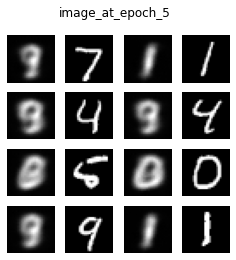

469/469 [==============================] - 106s 225ms/step - loss: 183.6099 - reconstruction_loss: 179.0321 - kl_loss: 4.1110


In [8]:
tf.keras.backend.clear_session()
optimizer = tf.keras.optimizers.Adam(1e-4)
vae.compile(optimizer=optimizer)

test_sample = test_images[:16, :, :, :]
sampling_callback = Display_sampling(vae, test_sample, display=True, save=True, clear_output=True)

total_epoch_count = 5
batch_size = 128
hist = vae.fit(
    x=train_images,
    epochs=total_epoch_count,
    batch_size=batch_size,
    shuffle=True,
    callbacks=[sampling_callback]
)

# vae.save("vae_save")
# loaded_model = tf.keras.models.load_model("vae_save")

+ 이미지 학습 과정

![img_git](./img/vae.gif)

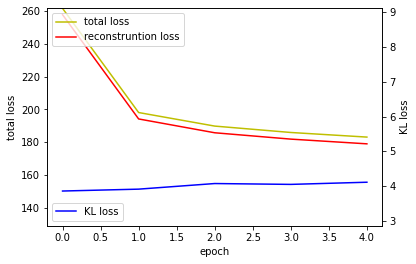

In [9]:
fig, total_ax = plt.subplots()
kl_ax = total_ax.twinx()

total_ax.plot(hist.history['loss'], 'y', label='total loss')
total_ax.plot(hist.history['reconstruction_loss'], 'r', label='reconstruntion loss')

kl_ax.plot(hist.history['kl_loss'], 'b', label='KL loss')

total_ax.set_ylim(min(hist.history['reconstruction_loss']) - 50, max(hist.history['loss']))
kl_ax.set_ylim(min(hist.history['kl_loss'])-1, max(hist.history['kl_loss']) + 5)

total_ax.set_xlabel('epoch')
total_ax.set_ylabel('total loss')
kl_ax.set_ylabel('KL loss')

total_ax.legend(loc='upper left')
kl_ax.legend(loc='lower left')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



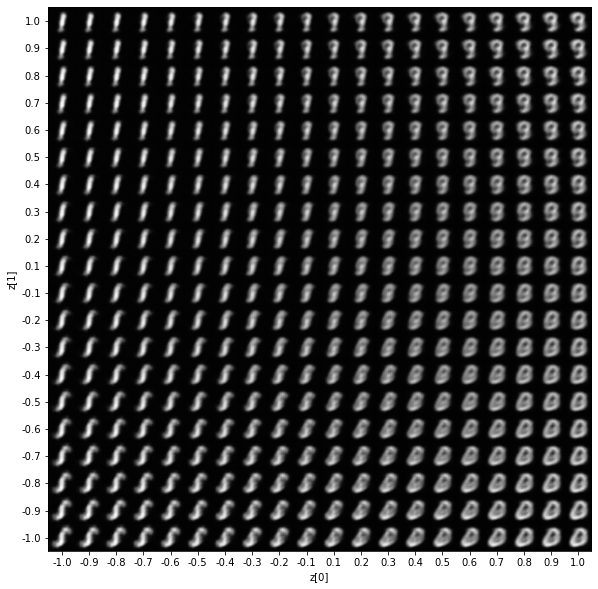

In [10]:
plot_latent_space(vae, n=20, figsize=10)

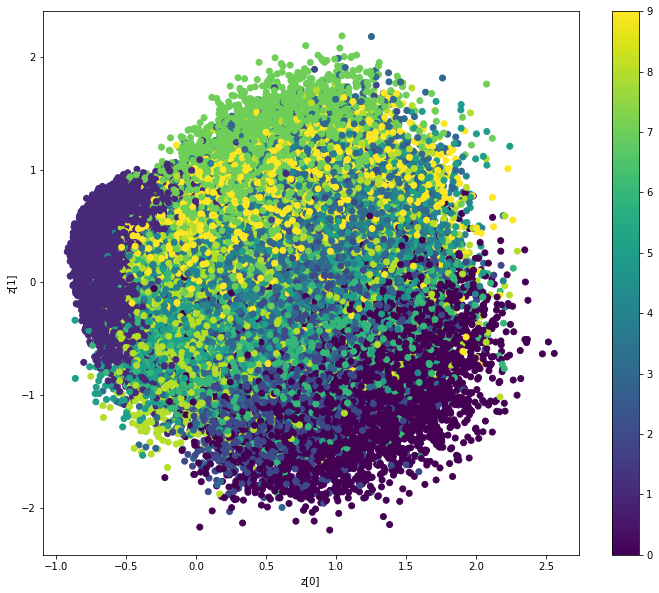

In [11]:
plot_label_clusters(vae, train_images, y_train)